## Dataset : Airbnb Singapore Dataset from InsideAirbnb
Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/

### EDA on Last 25 Variables in dataset  
The purpose of this file is to conduct exploratory data analysis on the last 25 variables in our dataset.  
### Done by: <b>Teck Meng</b>

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [142]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
sb.set()

### Additional Libraries

Import additional libraries

> Wordcloud : Library to create tag clouds in Python  

In [143]:
from wordcloud import WordCloud

---


# Features Description

This dataset contains 75 features about Airbnb listings within Singapore. This notebook encompasses the cleaning & exploration <br>data analysis (EDA) of the middle 25 features.
Below are the features with their respective descriptions</br>

This is the analysis on the last 25 columns of data about Airbnb listings which. The columns and its description are as follows:

49. **has_availability** : binary value indicating if this listing has availability
50. **availability_30** : number of days the listing is available for booking in the last 30 days                            
51. **availability_60** : number of days the listing is available for booking in the last 60 days                           
52. **availability_90** : number of days the listing is available for booking in the last 90 days                            
53. **availability_365** : number of days the listing is available for booking in the last 365 days                            
54. **calendar_last_scraped** : the date in which the data for each listing is scraped                       
55. **number_of_reviews** : total number of reviews for each Airbnb listing                             
56. **number_of_reviews_ltm** : total number of reviews for each Airbnb listing in the last 12 months                        
57. **number_of_reviews_l30d** : total number of reviews for each Airbnb listing in the last 30 days                       
58. **first_review** : date of 1st review received for each Airbnb listing                                 
59. **last_review** : date of last review received for each Airbnb listing                                 
60. **review_scores_rating** : the average score from 0 to 5 that rates the Airbnb listing's total score                       
61. **review_scores_accuracy** : the average score from 0 to 5 that rates how accurate the Airbnb listing online is to the actual place                        
62. **review_scores_cleanliness** : the average score from 0 to 5 that rates the Airbnb listing's overall cleanliness                      
63. **review_scores_checkin** : the average score from 0 to 5 that rates the Airbnb listing's ease of checking in                          
64. **review_scores_communication **: the average score from 0 to 5 that rates the Airbnb listing's host's availability to the guest during the guest's stay                    
65. **review_scores_location** : the average score from 0 to 5 that rates how ideal an Airbnb listing's location is to the guest                        
66. **review_scores_value** : the average score from 0 to 5 that rates whether an Airbnb listing's quality matches the price of the listing                           
67. **license**: indicates if the host is an authorised host                                       
68. **instant_bookable** : a binary variable indicating if the listing is instantly bookable                              
69. **calculated_host_listings_count** : number of listings the host has                
70. **calculated_host_listings_count_entire_homes**: number of listings the host has that are entire homes   
71. **calculated_host_listings_count_private_rooms** : number of listings the host has that are private rooms  
72. **calculated_host_listings_count_shared_rooms** : number of listings the host has that are shared rooms
73. **reviews_per_month**: average number of reviews received for each airbnb listing per month                             


---

# Visual data cleaning

##### In the context of maximizing host profit, the following features can be dropped from the dataset as they provide no relevant insights for our predictions.

1. **has_availability**
2. **availability_30**
3. **availability_60**
4. **availability_90**
5. **availability_365**
6. **calendar_last_scraped**
7. **number_of_reviews_ltm**
8. **number_of_reviews_130d**
9. **first_review**
10. **last_review**
11. **calculated_host_listings_count**
12. **calculated_host_listings_count_entire_homes**
13. **calculated_host_listings_count_private_rooms**
14. **calculated_host_listings_count_shared_rooms**
15. **reviews_per_month**



---

### Below are features that we think might be informative for analyzing factors that impact host profit, so we shall conduct our EDA on them and gather insights:

1. **review_scores_rating** : The rating could be an important factor that influences whether a guest would choose a listing.

2. **review_scores_accuracy** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

3. **review_scores_cleanliness** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

4. **review_scores_checkin** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

5. **review_scores_communication** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

6. **review_scores_location** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

7. **review_scores_value** : Similar to reviews_score_rating, this might be another significant metric that the guest look at to decide on whether to choose the listing or not.

8. **license** : Whether a host is licensed or not might impact how trustworthy a listing seem to the guest.

9. **instant_bookable** : Whether a place is instantly bookable or not might affect the profits.

10. **number_of_reviews** : This might be an indicator of how popular a listing is and whether it affects profits

In [144]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [145]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

---

>## Import the Dataset

In [146]:
airDF = pd.read_csv("listings.csv")
airDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,71609.0,https://www.airbnb.com/rooms/71609,2.022120e+13,12/29/2022,city scrape,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,4.78,4.26,4.32,NaN,f,6,0,6,0,0.15
1,71896.0,https://www.airbnb.com/rooms/71896,2.022120e+13,12/29/2022,city scrape,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,4.43,4.17,4.04,NaN,t,6,0,6,0,0.17
2,71903.0,https://www.airbnb.com/rooms/71903,2.022120e+13,12/29/2022,city scrape,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,4.64,4.50,4.36,NaN,f,6,0,6,0,0.33
3,275343.0,https://www.airbnb.com/rooms/275343,2.022120e+13,12/29/2022,city scrape,Amazing Room with window 10min to Redhill,Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.42,4.53,4.63,S0399,f,46,2,44,0,0.19
4,275344.0,https://www.airbnb.com/rooms/275344,2.022120e+13,12/29/2022,city scrape,15 mins to Outram MRT Single Room,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.54,4.62,4.46,S0399,f,46,2,44,0,0.11


In [147]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3035 non-null   float64
 1   listing_url                                   3035 non-null   object 
 2   scrape_id                                     3035 non-null   float64
 3   last_scraped                                  3035 non-null   object 
 4   source                                        3035 non-null   object 
 5   name                                          3035 non-null   object 
 6   description                                   2985 non-null   object 
 7   neighborhood_overview                         1973 non-null   object 
 8   picture_url                                   3035 non-null   object 
 9   host_id                                       3035 non-null   i

In [148]:
print(airDF.dtypes)

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


---
## 1. EDA on review_score_rating
<b>Description</b>: The average score from 0 to 5 that rates the Airbnb listing's total score 


In [149]:
reviewRating = pd.DataFrame(airDF["review_scores_rating"])
reviewRating

,review_scores_rating
0,4.44
1,4.16
2,4.41
3,4.40
4,4.50
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [150]:
reviewRating.value_counts()

review_scores_rating
5.00                    592
4.00                    159
4.50                     94
4.67                     50
3.00                     45
                       ... 
4.15                      1
4.16                      1
4.23                      1
2.33                      1
3.40                      1
Length: 112, dtype: int64

In [151]:
reviewRating.describe()

,review_scores_rating
count,1744.000000
mean,4.474971
std,0.844021
min,0.000000
25%,4.330000
50%,4.720000
75%,5.000000
max,5.000000


In [152]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(reviewRating), reviewRating.isna().sum().sum()))

reviewRating = reviewRating.dropna()
reviewRating

Total Values: 3035, Null Values: 1291


,review_scores_rating
0,4.44
1,4.16
2,4.41
3,4.40
4,4.50
...,...
2973,4.00
2974,5.00
2976,5.00
2977,5.00


In [153]:
reviewRating.describe()

,review_scores_rating
count,1744.000000
mean,4.474971
std,0.844021
min,0.000000
25%,4.330000
50%,4.720000
75%,5.000000
max,5.000000


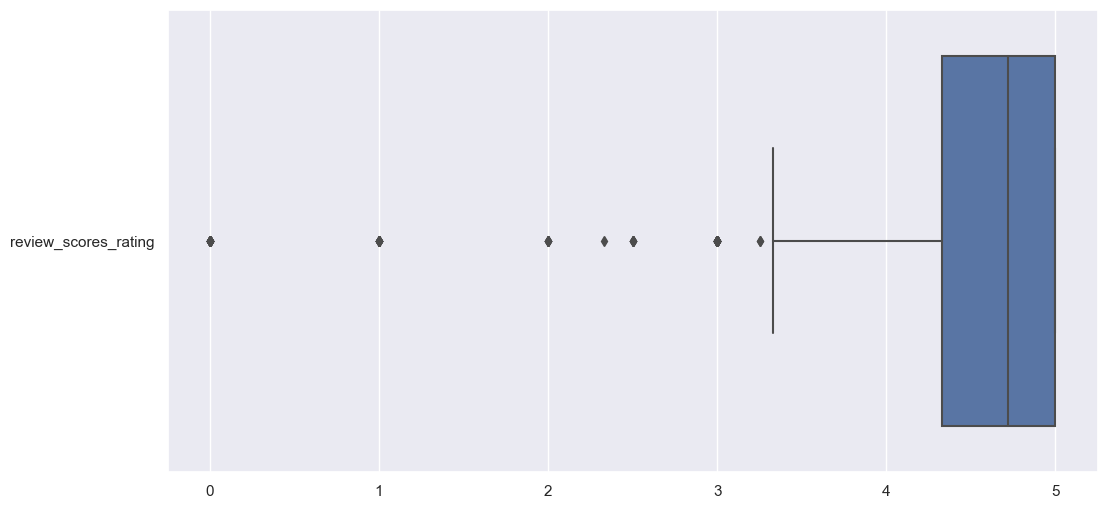

In [154]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = reviewRating, orient = 'h')
plt.show()

 INSIGHT : Generally we can see that most of the airbnb listings that had reviews have a high review scores rating, with a median of 4.72 rating.

---

## 2. EDA on review_scores_accuracy
<b>Description</b>: the average score from 0 to 5 that rates how accurate the Airbnb listing online is to the actual place 

In [155]:
accRating = pd.DataFrame(airDF["review_scores_accuracy"])
accRating

,review_scores_accuracy
0,4.37
1,4.22
2,4.39
3,4.16
4,4.69
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [156]:
accRating.value_counts()

review_scores_accuracy
5.00                      626
4.00                      133
4.50                       88
4.67                       55
3.00                       46
                         ... 
4.34                        1
4.41                        1
4.46                        1
4.49                        1
0.00                        1
Length: 110, dtype: int64

In [157]:
accRating.describe()

,review_scores_accuracy
count,1711.000000
mean,4.591783
std,0.608629
min,0.000000
25%,4.480000
50%,4.800000
75%,5.000000
max,5.000000


In [158]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(accRating), accRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1324


In [159]:
#Drop null values
accRating = accRating.dropna()
accRating

,review_scores_accuracy
0,4.37
1,4.22
2,4.39
3,4.16
4,4.69
...,...
2973,5.00
2974,5.00
2976,5.00
2977,5.00


In [160]:
accRating.describe()

,review_scores_accuracy
count,1711.000000
mean,4.591783
std,0.608629
min,0.000000
25%,4.480000
50%,4.800000
75%,5.000000
max,5.000000


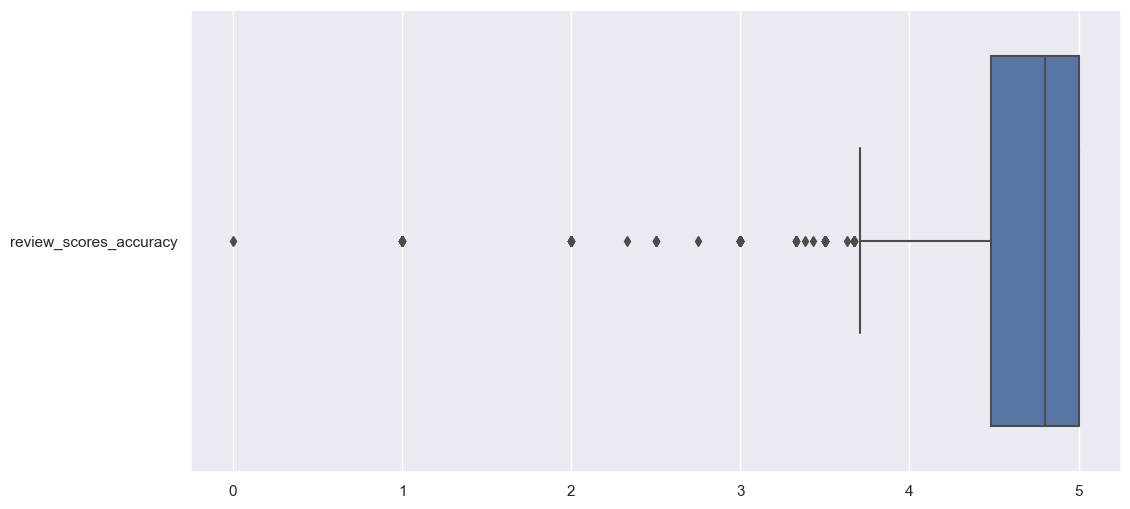

In [161]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = accRating, orient = 'h')
plt.show()

INSIGHT : We can see a high concentration of data points towards the upper end of the scale, with a median score of 4.80, indicating a right skewed distribution which means majority of listings that had reviews are accurate to the listings put on the Airbnb website.

---

## 3. EDA on review_scores_cleanliness
<b>Description</b> : The average score from 0 to 5 that rates the Airbnb listing's overall cleanliness 

In [162]:
cleanRating = pd.DataFrame(airDF["review_scores_cleanliness"])
cleanRating

,review_scores_cleanliness
0,4.00
1,4.09
2,4.52
3,4.26
4,4.23
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [163]:
cleanRating.value_counts()

review_scores_cleanliness
5.00                         534
4.00                         161
4.50                         107
3.00                          64
4.67                          44
                            ... 
4.12                           1
4.30                           1
4.31                           1
4.37                           1
4.34                           1
Length: 131, dtype: int64

In [164]:
cleanRating.describe()

,review_scores_cleanliness
count,1712.000000
mean,4.507512
std,0.617658
min,0.000000
25%,4.270000
50%,4.690000
75%,5.000000
max,5.000000


In [165]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(cleanRating), cleanRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1323


In [166]:
#Drop null values
cleanRating = cleanRating.dropna()
cleanRating

,review_scores_cleanliness
0,4.00
1,4.09
2,4.52
3,4.26
4,4.23
...,...
2973,5.00
2974,5.00
2976,5.00
2977,5.00


<AxesSubplot:>

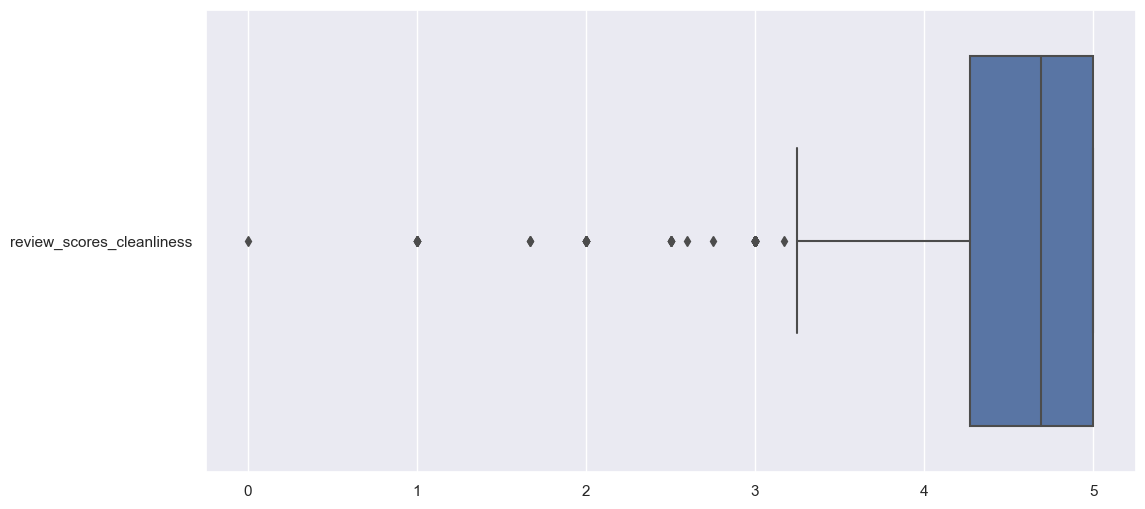

In [167]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = cleanRating, orient = 'h')

INSIGHT : Similar to review_scores_accuracy, we can see that both datasets share a similar characteristic where majority of the data points are concentrated towards the upper end, with a median of 4.50, which shows that majority of listings that had reviews are quite clean.

---

## 4. EDA on review_scores_checkin
<b>Description</b> : The average score from 0 to 5 that rates the Airbnb listing's ease of checking in    

In [168]:
checkinRating = pd.DataFrame(airDF["review_scores_checkin"])
checkinRating


,review_scores_checkin
0,4.63
1,4.43
2,4.63
3,4.47
4,4.62
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [169]:
checkinRating.value_counts()

review_scores_checkin
5.00                     791
4.50                      79
4.00                      79
4.67                      43
4.75                      41
                        ... 
4.48                       1
4.49                       1
4.51                       1
4.52                       1
0.00                       1
Length: 92, dtype: int64

In [170]:
checkinRating.describe()

,review_scores_checkin
count,1712.000000
mean,4.718814
std,0.543987
min,0.000000
25%,4.670000
50%,4.930000
75%,5.000000
max,5.000000


In [171]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(checkinRating), checkinRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1323


In [172]:
checkinRating = checkinRating.dropna()
checkinRating

,review_scores_checkin
0,4.63
1,4.43
2,4.63
3,4.47
4,4.62
...,...
2973,5.00
2974,5.00
2976,5.00
2977,5.00


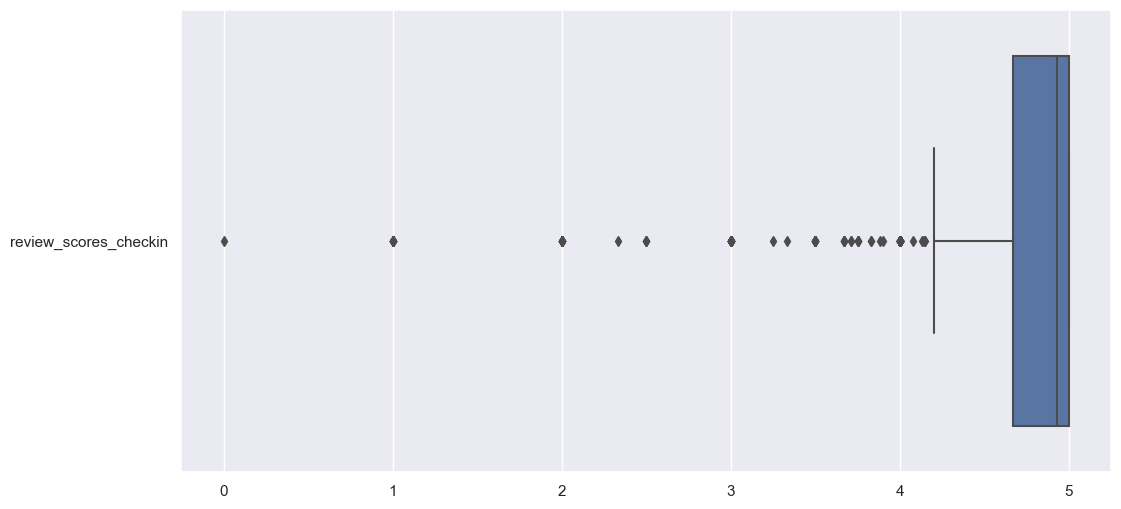

In [173]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = checkinRating, orient = 'h')
plt.show()

INSIGHT : From the box plot it seems that most of the guests are able to check in easily as the scores are mostly above 4.5 and a 5.00 rating, with a mean of 4.718 amd median of 4.93. This shows that the check in process for most of the listings that had a review was generally good.

---

## 5. EDA on review_scores_communication
<b>Description</b> : The average score from 0 to 5 that rates the Airbnb listing's host's availability to the guest during the guest's stay    

In [174]:
commRating = pd.DataFrame(airDF["review_scores_communication"])
commRating

,review_scores_communication
0,4.78
1,4.43
2,4.64
3,4.42
4,4.54
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [175]:
commRating.value_counts()

review_scores_communication
5.00                           807
4.00                            72
4.50                            72
4.75                            45
4.67                            41
                              ... 
4.10                             1
4.24                             1
4.29                             1
4.42                             1
3.95                             1
Length: 92, dtype: int64

In [176]:
commRating.describe()

,review_scores_communication
count,1713.000000
mean,4.716071
std,0.566867
min,0.000000
25%,4.670000
50%,4.950000
75%,5.000000
max,5.000000


In [177]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(commRating), commRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1322


In [178]:
commRating = commRating.dropna()
commRating.describe()

,review_scores_communication
count,1713.000000
mean,4.716071
std,0.566867
min,0.000000
25%,4.670000
50%,4.950000
75%,5.000000
max,5.000000


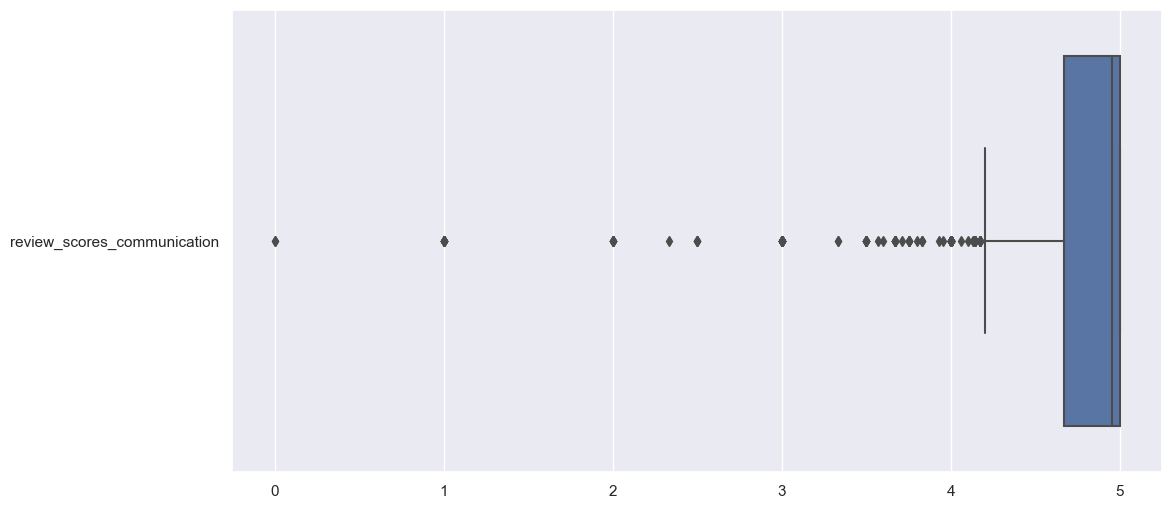

In [179]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = commRating, orient = 'h')
plt.show()

INSIGHT : From the boxplot, it seems that the majority of guest gave similar ratings, with a mean of 4.71 and a median of 4.95, suggesting that the distribution of the data is skewed towards the upper range with a significant number of outliers right below the lower whisker(25% quartile). This also means that for most of the listings that had reviews, the host had good communication with the visitor.

---

# 6. EDA on review_scores_location
<b>Description</b> : The average score from 0 to 5 that rates how ideal an Airbnb listing's location is to the guest

In [180]:
locationRating = pd.DataFrame(airDF["review_scores_location"])
locationRating

,review_scores_location
0,4.26
1,4.17
2,4.50
3,4.53
4,4.62
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [181]:
locationRating.describe()

,review_scores_location
count,1711.000000
mean,4.703343
std,0.468869
min,0.000000
25%,4.585000
50%,4.880000
75%,5.000000
max,5.000000


In [182]:
locationRating.value_counts()

review_scores_location
5.00                      745
4.00                      109
4.50                       71
4.67                       56
4.75                       46
                         ... 
4.18                        1
4.19                        1
4.22                        1
4.23                        1
4.48                        1
Length: 104, dtype: int64

In [183]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(locationRating), locationRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1324


In [184]:
locationRating = locationRating.dropna()
locationRating.describe()

,review_scores_location
count,1711.000000
mean,4.703343
std,0.468869
min,0.000000
25%,4.585000
50%,4.880000
75%,5.000000
max,5.000000


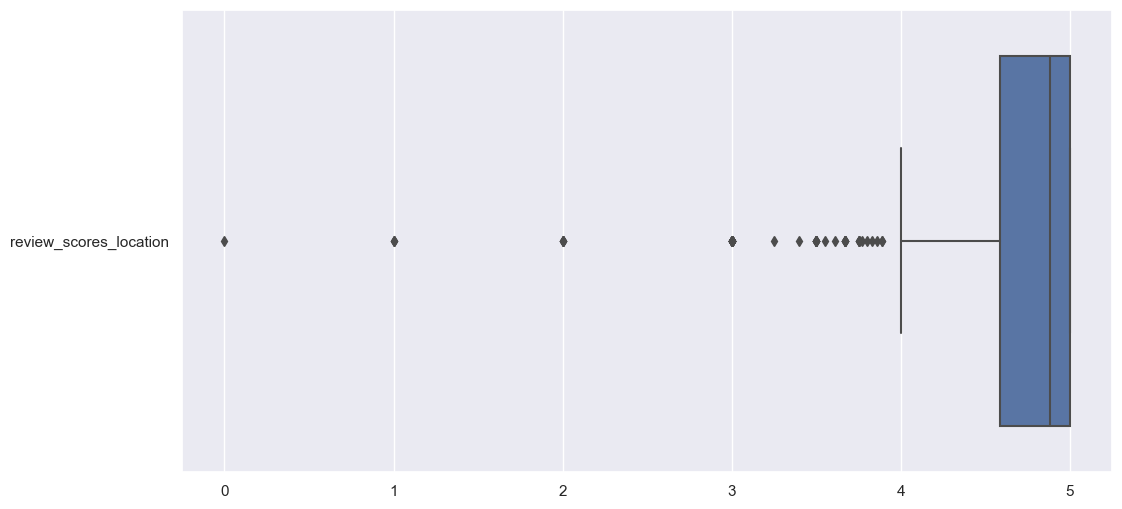

In [185]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = locationRating, orient = 'h')
plt.show()

INSIGHT : The boxplot suggest that the majority of the data points are tightly clustered in the upper region, with a mean of 4.70 and median of 5, which shows that for most of the listings that had reviews, their location was good for visitors.

---

# 7. EDA on review_scores_value
<b>Description</b> : The average score from 0 to 5 that rates whether an Airbnb listing's quality matches the price of the listing 

In [186]:
valueRating = pd.DataFrame(airDF["review_scores_value"])
valueRating

,review_scores_value
0,4.32
1,4.04
2,4.36
3,4.63
4,4.46
...,...
3030,NaN
3031,NaN
3032,NaN
3033,NaN


In [187]:
valueRating.value_counts()

review_scores_value
5.00                   461
4.00                   211
4.50                   124
3.00                    56
4.67                    53
                      ... 
4.04                     1
4.18                     1
4.05                     1
4.09                     1
0.00                     1
Length: 117, dtype: int64

In [188]:
valueRating.describe()

,review_scores_value
count,1711.000000
mean,4.471011
std,0.607347
min,0.000000
25%,4.250000
50%,4.600000
75%,5.000000
max,5.000000


In [189]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(valueRating), valueRating.isna().sum().sum()))

Total Values: 3035, Null Values: 1324


In [190]:
valueRating = valueRating.dropna()
valueRating.describe()

,review_scores_value
count,1711.000000
mean,4.471011
std,0.607347
min,0.000000
25%,4.250000
50%,4.600000
75%,5.000000
max,5.000000


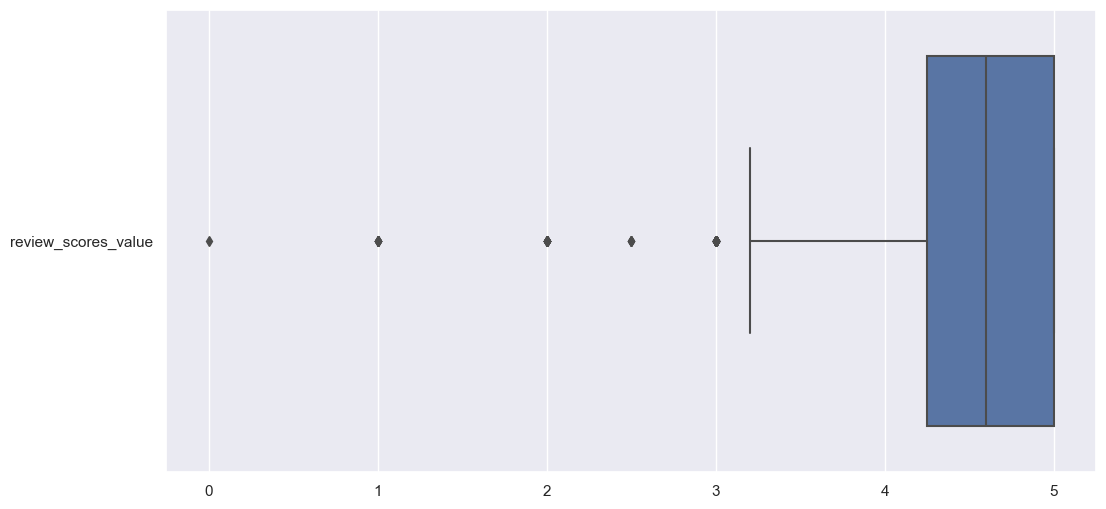

In [191]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = valueRating , orient = 'h')
plt.show()

INSIGHT :  Looking at the box plot, we can see that data points concentrated at the upper region, with a mean of 4.47, suggesting that the data is skewed towards the upper value. However, if we were to compare it to the other review_scores EDA, a mean of 4.47 is considered to be at the lower end.

---


# 8. EDA on license
<b>Description</b> : Indicates if the host is an authorised host        

In [192]:
licenseDF = pd.DataFrame(airDF['license'])
licenseDF

,license
0,NaN
1,NaN
2,NaN
3,S0399
4,S0399
...,...
3030,S7292
3031,S7292
3032,Authorised Serviced Apartment
3033,M3555


In [193]:
licenseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   license  969 non-null    object
dtypes: object(1)
memory usage: 23.8+ KB


In [194]:
licenseDF.describe()

,license
count,969
unique,109
top,Authorised Serviced Apartment
freq,506


In [195]:
licenseDF.value_counts()

license                      
Authorised Serviced Apartment    506
S0399                             61
S0451                             16
S0452                             16
S7292                             15
                                ... 
S2011                              1
S0279                              1
M6723                              1
M7777                              1
S0002                              1
Length: 109, dtype: int64

In [196]:
#create Boolean DataFrame of Nan values
known_cols = licenseDF[licenseDF.notna().all(axis = 1)]
nan_cols = licenseDF[licenseDF.isna().all(axis = 1)]

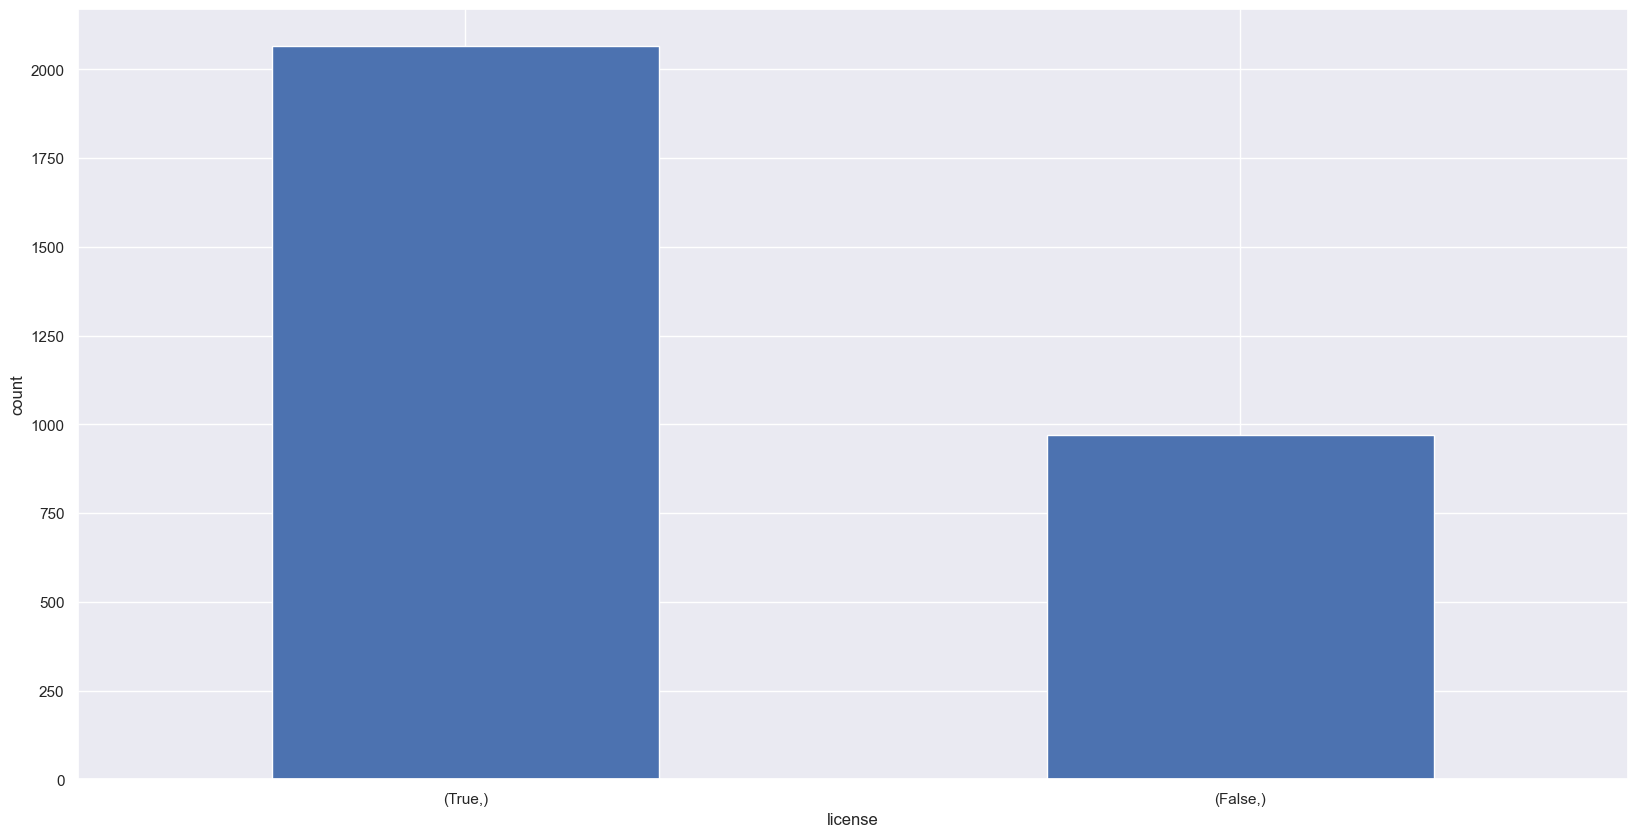

In [197]:
#create a boolean DataFrame of nan values
groupedLicenseDF = licenseDF.isna()

f= plt.figure(figsize = (20, 10))
groupedLicenseDF.value_counts().plot(kind='bar')

plt.xticks(rotation =0, ha = "center")
plt.ylabel("count")
plt.show()

In [198]:

print("Total number of listings\t:",len(airDF))
print("Hosts with a License\t\t:", len(known_cols))
print("Hosts without a License\t\t:", len(nan_cols))
print(" ")
print("{:.2%} of the hosts have a license".format(len(known_cols)/len(airDF)))
print("{:.2%} of the hosts do not have a license".format(len(nan_cols)/len(airDF)))

Total number of listings	: 3035
Hosts with a License		: 969
Hosts without a License		: 2066
 
31.93% of the hosts have a license
68.07% of the hosts do not have a license


INSIGHT : Looking at the frequency plot, we can see that 31.93% of the hosts have a license and 68.07% do not have license, however note that hosts who are renting out their own properties do not need a license as long as it hits the minimum stay of 3months for private properties and 6 months for public housing. Hence, it is not surprising to see that majority of the hosts operate without a license.

---

# 9. EDA on instant_bookable
<b>Description</b> : A binary variable indicating if the listing is instantly bookable   

In [199]:
instantbookDF = pd.DataFrame(airDF['instant_bookable'])
instantbookDF

,instant_bookable
0,f
1,t
2,f
3,f
4,f
...,...
3030,f
3031,f
3032,t
3033,f


In [200]:
instantbookDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   instant_bookable  3035 non-null   object
dtypes: object(1)
memory usage: 23.8+ KB


In [201]:
instantbookDF.value_counts()

instant_bookable
f                   1908
t                   1127
dtype: int64

<AxesSubplot:xlabel='instant_bookable', ylabel='Count'>

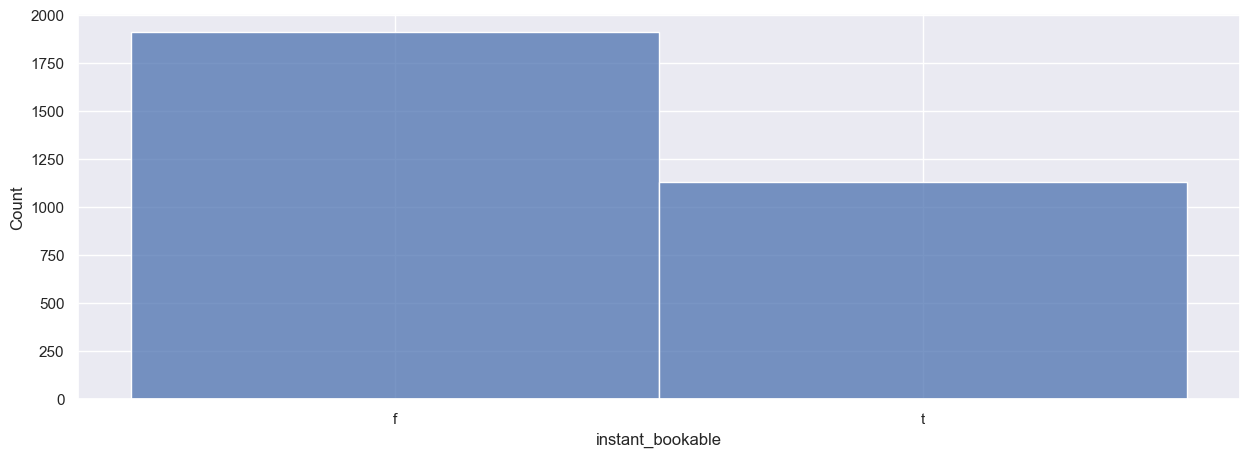

In [202]:
f= plt.figure(figsize = (15, 5))
sb.histplot(data = instantbookDF["instant_bookable"])

INSIGHT : The frequency plot suggests that majority of hosts did not enable the instant bookable feature on airbnb - with a count of 1908 that chose not to enable this feature and 1127 of them chose to enable it.

# 10. EDA on number_of_reviews
<b>Description</b> : total number of reviews for each Airbnb listing    

In [203]:
numberOfReviewsDF = pd.DataFrame(airDF["number_of_reviews"])
numberOfReviewsDF

,number_of_reviews
0,20
1,24
2,47
3,22
4,14
...,...
3030,0
3031,0
3032,0
3033,0


In [204]:
numberOfReviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_of_reviews  3035 non-null   int64
dtypes: int64(1)
memory usage: 23.8 KB


In [205]:
numberOfReviewsDF.describe()

,number_of_reviews
count,3035.000000
mean,10.148600
std,29.575841
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,369.000000


<AxesSubplot:>

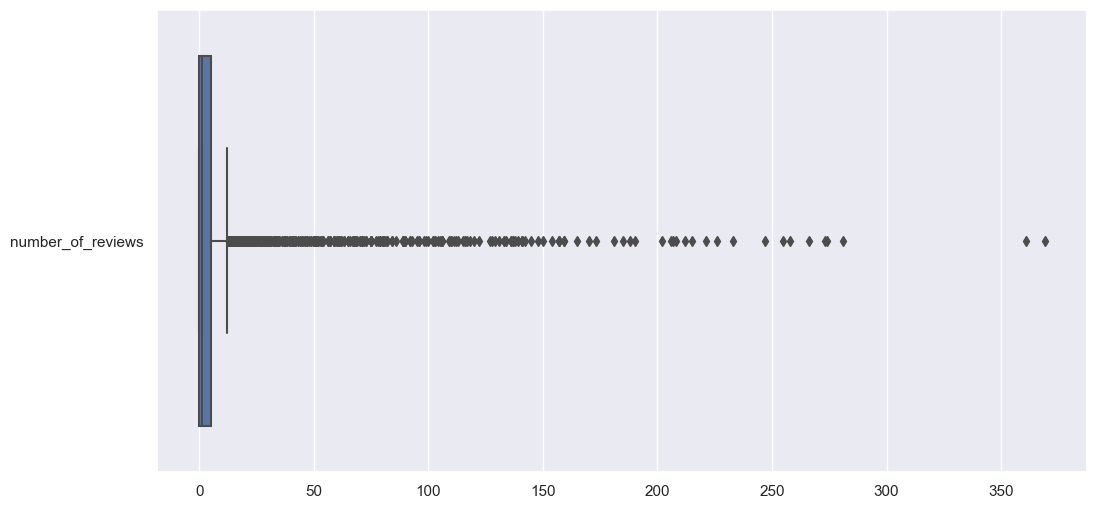

In [206]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = numberOfReviewsDF , orient = 'h')

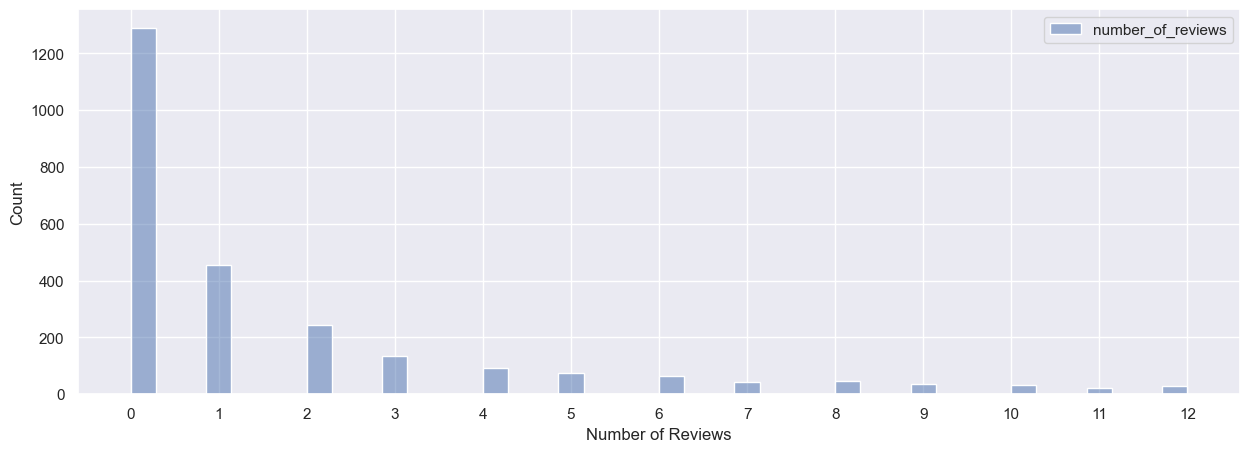

In [218]:
f= plt.figure(figsize = (15, 5))
plt.xticks(np.arange(0, len(numberOfReviewsDF["number_of_reviews"].unique()), step=1))  # Set label locations.
sb.histplot(data = numberOfReviewsDF).set(xlabel = "Number of Reviews")
None

### There are quite a few outliers, let us take a look without the outliers to find the trend

In [208]:
numberOfReviewsDF = remove_outliers(numberOfReviewsDF, ["number_of_reviews"])
numberOfReviewsDF

,number_of_reviews
5,12
8,12
9,4
14,0
16,0
...,...
3030,0
3031,0
3032,0
3033,0


In [209]:
numberOfReviewsDF.value_counts()

number_of_reviews
0                    1291
1                     455
2                     244
3                     134
4                      93
5                      76
6                      66
8                      45
7                      44
9                      37
10                     33
12                     28
11                     22
dtype: int64

<AxesSubplot:>

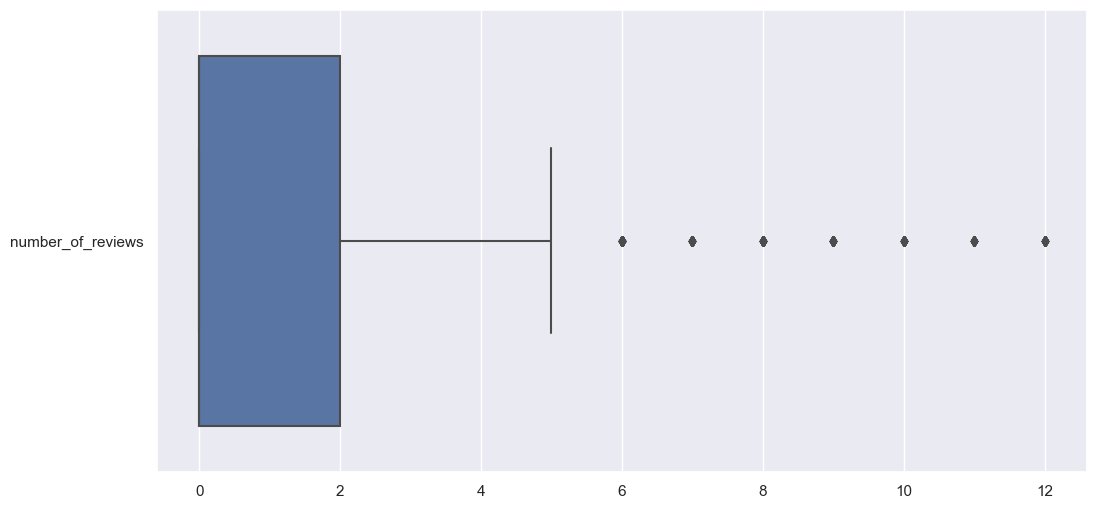

In [210]:
f = plt.figure(figsize=(12,6))
sb.boxplot(data = numberOfReviewsDF , orient = 'h')

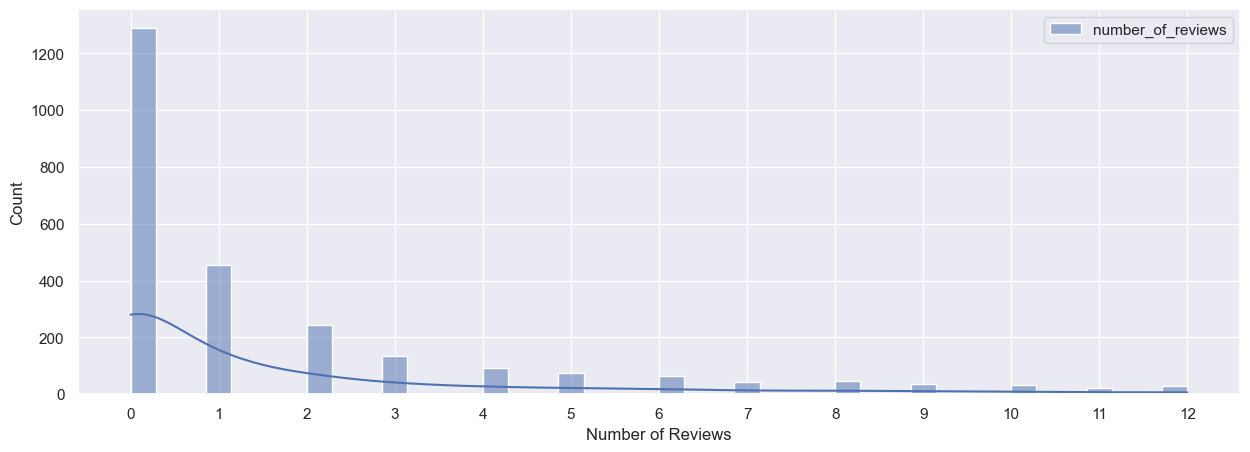

In [217]:
f= plt.figure(figsize = (15, 5))
plt.xticks(np.arange(0, len(numberOfReviewsDF["number_of_reviews"].unique()), step=1))  # Set label locations.
sb.histplot(data = numberOfReviewsDF, kde = True).set(xlabel = "Number of Reviews")
None

Insight: We can see that majority of listings had 0 reviews, which means that possibly we should only consider houses that have high number of reviews for our prediction.

---
## INSIGHT CONCLUSION: 

Majority of the variables in the dataset are skewed to the right suggests that there many be some significant differences between the upper and lower values. Most of the data points are concentrated on the upper end of the range, with a few outliers that extend to the lower tail of the distribution. In conclusion, we can assume that with a higher reviews rating or score can potentially help us to attract more guests and ultimately maximizing our profit as an Airbnb Host. However, it is important to note that it is not the only factor / key factor that influences booking rates and profitability.